In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import glob

# Set the folder path
folder_path = "/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Print the list of CSV files
# print(f"Found CSV files: \n", csv_files, "\n")

# Create a dictionary with filenames as keys and their paths as values
file_dict = {os.path.splitext(os.path.basename(file))[0]: file for file in csv_files}

# Print the dictionary
print(file_dict)

for file in csv_files:
  print(f"{file} \n")

{'synthetic_data': '/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/synthetic_data.csv', 'Sort_Synthetic_Dataset': '/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/Sort_Synthetic_Dataset.csv'}
/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/synthetic_data.csv 

/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/Sort_Synthetic_Dataset.csv 



# Correlation Maps

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory to save heatmaps
heatmap_save_dir = "/content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps"
os.makedirs(heatmap_save_dir, exist_ok=True)  # Ensure the directory exists

# Reload the imputed dataset
for file in csv_files:
  print(f"\nProcessing Dataset: {file}")
  df_imputed = pd.read_csv(file)

  # Check correlation of sleep and recovery features with RSImod
  sleep_recovery_features = [
      "RHR", "HRV", "Recovery", "Sleep.Score", "Hours.in.Bed", "Hours.of.Sleep",
      "Sleep.Efficiency....", "Wake.Periods", "Sleep.Disturbances", "Latency..min.",
      "Cycles", "REM.Sleep..hours.", "Deep.Sleep..hours.", "Light.Sleep..hours.",
      "Awake..hours.", "Sleep.Debt..hours.", "Sleep.Consistency", "Respiratory.Rate",
      "Total.Cycle.Sleep.Time..hours.", "REM.Percentage", "Deep.Sleep.Percentage",
      "Restorative.Sleep..hours.", "Restorative.Sleep...."
  ]

  # Compute correlation with RSImod
  correlation_values = df_imputed[sleep_recovery_features + ["RSI"]].corr()["RSI"].sort_values(ascending=False)

  # Plot correlation heatmap
  for filename, filepath in file_dict.items():
    if filename in file:
      plt.figure(figsize=(20, 10))
      sns.heatmap(df_imputed[sleep_recovery_features + ["RSI"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
      plt.title(f"Correlation Heatmap of Sleep & Recovery Features with RSImod: {filename}")
      # plt.show()
      # Save the figure
      save_path = os.path.join(heatmap_save_dir, f"{filename}_correlation_heatmap.png")
      plt.savefig(save_path, bbox_inches="tight", dpi=300)
      plt.close()  # Close the plot to free memory

      print(f"Saved heatmap: {save_path}")



Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/synthetic_data.csv
Saved heatmap: /content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps/synthetic_data_correlation_heatmap.png

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/Sort_Synthetic_Dataset.csv
Saved heatmap: /content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps/Sort_Synthetic_Dataset_correlation_heatmap.png


In [5]:
synthetic_dataset = pd.read_csv("/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/synthetic_data.csv")
synthetic_dataset.fillna(0, inplace=True)
print(synthetic_dataset.isna().sum().sum())

0


In [6]:
synthetic_dataset.head()

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 15 Tucker,10/23/2021,Friday,60.832530,80.734056,79.712621,80.801861,10.955109,8.608227,8.753437,...,0.000000,0.000000,72.790564,16.921843,5.396208,5.522388,22.166207,2.494763,42.641454,0.410363
1,Athlete 5 Jackson,2/17/2022,Tuesday,58.162552,122.878076,17.517450,97.787498,7.098886,11.201163,8.721973,...,0.366914,3.480000,72.875981,17.033947,5.970516,18.184601,5.091319,5.160768,59.308939,0.451126
2,Athlete 7 Klein,9/15/2021,Saturday,59.358808,86.777370,58.774419,76.523884,7.724380,6.913288,9.004537,...,0.864161,0.982116,70.003306,13.105698,7.967208,26.926598,17.824219,2.230424,44.265684,0.393580
3,Athlete 12 Porter,02-11-2022,Wednesday,63.868174,85.555643,72.464713,63.949539,10.355113,5.118691,8.860267,...,0.722621,0.124787,61.087186,16.846061,5.669523,26.595218,24.629172,2.735798,48.046954,0.340803
4,Athlete 17 Laeticia Ziba,2/27/2022,Sunday,60.049299,85.909241,60.050618,57.535493,7.701768,6.988461,8.434998,...,0.843809,0.971348,62.784790,16.557222,7.327807,25.931106,17.918036,3.442668,43.858169,0.392229


In [7]:
sorted_synthetic_dataset = pd.read_csv('/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/Sort_Synthetic_Dataset.csv')
sorted_synthetic_dataset.fillna(0, inplace=True)
print(sorted_synthetic_dataset.isna().sum().sum())

0


In [8]:
sorted_synthetic_dataset.head()

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 1 Bergdorf,12-16-2021,Sunday,58.681615,162.516356,1.000000,62.234846,7.323889,10.262617,9.122431,...,0.589367,0.670263,76.062156,17.417197,6.913184,29.709915,15.991944,3.667167,31.011345,0.435290
1,Athlete 1 Bergdorf,12-28-2021,Saturday,55.119153,58.078507,22.011092,100.000000,10.702070,7.797921,9.597218,...,0.187028,0.889960,47.273548,15.596304,1.046646,31.963415,13.869150,2.409684,34.321055,0.420109
2,Athlete 1 Bergdorf,02-11-2022,0,59.369350,84.965724,58.338076,77.012303,7.885798,6.970669,8.910126,...,0.906220,1.086922,77.645358,16.392271,7.084130,26.345516,17.657529,3.468589,44.631238,0.390046
3,Athlete 1 Bergdorf,9-30-2021,Sunday,59.390466,84.544114,57.788845,76.096144,7.724825,7.001014,8.916533,...,0.874208,0.957935,69.087936,16.545399,7.201905,25.978174,17.674290,3.512028,44.440170,0.392915
4,Athlete 1 Bergdorf,11-30-2021,Monday,48.998093,187.276423,30.655540,49.965238,7.221317,5.595558,9.034040,...,0.450568,0.000000,74.173324,11.880511,7.874259,25.837469,16.449736,3.742130,48.358088,0.419118


# Spliting the datasets in train and test

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Define target variable and features
# target = "RSI"
# features = sleep_recovery_features

# # Dictionary to store processed datasets
# processed_datasets = {}

# # Loop through all imputed datasets
# for file in csv_files:
#     print(f"\nProcessing Dataset: {file}")

#     # Load dataset
#     df = pd.read_csv(file)

#     # Ensure all features are numeric
#     df[features] = df[features].apply(pd.to_numeric, errors="coerce")

#     # Drop rows with NaN values
#     df_cleaned = df.dropna(subset=features + [target])

#     # Split data into training, validation, and testing sets
#     X = df_cleaned[features]
#     y = df_cleaned[target]

#     # First split: 80% train+validation, 20% test
#     X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Second split: 75% train, 25% validation (out of the 80% from first split)
#     # This gives approximately 60% train, 20% validation, 20% test overall
#     X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

#     # Standardize features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
#     X_test_scaled = scaler.transform(X_test)

#     # Store processed data in a dictionary with the filename as key
#     filename = file.split("/")[-1].replace(".csv", "")  # Extract filename without extension
#     processed_datasets[filename] = {
#         "X_train": X_train_scaled,
#         "X_test": X_test_scaled,
#         "X_val": X_val_scaled,
#         "y_train": y_train,
#         "y_test": y_test,
#         "y_val": y_val
#     }

#     # Display dataset shape after preprocessing
#     print(f"{filename}: X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}, "
#           f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")


Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/synthetic_data.csv
synthetic_data: X_train: (6000, 23), X_val: (2000, 23), X_test: (2000, 23), y_train: (6000,), y_val: (2000,), y_test: (2000,)


# Passing Synthetic Data on Saved Models

In [9]:
synthetic_dataset = synthetic_dataset.drop(columns=["Athlete", "Date", "Day.of.Week"])
synthetic_dataset.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Sleep.Disturbances,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,60.832530,80.734056,79.712621,80.801861,10.955109,8.608227,8.753437,96.227932,6.606727,5.202402,...,0.000000,0.000000,72.790564,16.921843,5.396208,5.522388,22.166207,2.494763,42.641454,0.410363
1,58.162552,122.878076,17.517450,97.787498,7.098886,11.201163,8.721973,85.531700,13.015130,7.534452,...,0.366914,3.480000,72.875981,17.033947,5.970516,18.184601,5.091319,5.160768,59.308939,0.451126
2,59.358808,86.777370,58.774419,76.523884,7.724380,6.913288,9.004537,89.410849,14.351092,11.100310,...,0.864161,0.982116,70.003306,13.105698,7.967208,26.926598,17.824219,2.230424,44.265684,0.393580
3,63.868174,85.555643,72.464713,63.949539,10.355113,5.118691,8.860267,92.371770,17.776942,5.061662,...,0.722621,0.124787,61.087186,16.846061,5.669523,26.595218,24.629172,2.735798,48.046954,0.340803
4,60.049299,85.909241,60.050618,57.535493,7.701768,6.988461,8.434998,88.907749,13.981888,11.233157,...,0.843809,0.971348,62.784790,16.557222,7.327807,25.931106,17.918036,3.442668,43.858169,0.392229


In [10]:
synthetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RHR                             10000 non-null  float64
 1   HRV                             10000 non-null  float64
 2   Recovery                        10000 non-null  float64
 3   Sleep.Score                     10000 non-null  float64
 4   Hours.in.Bed                    10000 non-null  float64
 5   Hours.of.Sleep                  10000 non-null  float64
 6   Sleep.Need                      10000 non-null  float64
 7   Sleep.Efficiency....            10000 non-null  float64
 8   Wake.Periods                    10000 non-null  float64
 9   Sleep.Disturbances              10000 non-null  float64
 10  Latency..min.                   10000 non-null  float64
 11  Cycles                          10000 non-null  float64
 12  REM.Sleep..hours.               1

In [11]:
mice_data = pd.read_csv("/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_MICE.csv")
mice_data.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Sleep.Disturbances,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,59.687363,84.142084,59.466221,76.403309,7.780813,6.890545,8.908637,88.868763,14.156062,11.623919,...,0.89733,0.981646,62.365058,16.465773,7.179415,26.371142,17.792928,3.415374,44.145242,0.389060
1,48.000000,120.000000,58.000000,51.000000,6.360000,5.620000,11.020000,88.000000,7.000000,6.000000,...,0.74000,3.210000,44.463945,11.718800,5.620000,26.300000,22.300000,3.970000,64.600000,0.330000
2,59.687363,84.142084,59.466221,76.403309,7.780813,6.890545,8.908637,88.868763,14.156062,11.623919,...,0.89733,0.981646,62.365058,16.465773,7.179415,26.371142,17.792928,3.415374,44.145242,0.389060
3,59.687363,84.142084,59.466221,76.403309,7.780813,6.890545,8.908637,88.868763,14.156062,11.623919,...,0.89733,0.981646,62.365058,16.465773,7.179415,26.371142,17.792928,3.415374,44.145242,0.389060
4,53.000000,121.000000,61.000000,55.000000,6.250000,5.560000,10.150000,89.000000,8.000000,7.000000,...,0.70000,1.890000,37.000000,13.007800,5.560000,25.100000,8.600000,2.680000,39.600000,0.356758


In [12]:
mice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RHR                             3111 non-null   float64
 1   HRV                             3111 non-null   float64
 2   Recovery                        3111 non-null   float64
 3   Sleep.Score                     3111 non-null   float64
 4   Hours.in.Bed                    3111 non-null   float64
 5   Hours.of.Sleep                  3111 non-null   float64
 6   Sleep.Need                      3111 non-null   float64
 7   Sleep.Efficiency....            3111 non-null   float64
 8   Wake.Periods                    3111 non-null   float64
 9   Sleep.Disturbances              3111 non-null   float64
 10  Latency..min.                   3111 non-null   float64
 11  Cycles                          3111 non-null   float64
 12  REM.Sleep..hours.               31

In [13]:
import os
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Step 1: Setup ===
saved_model_dir = "/content/drive/MyDrive/ML_Project_Dataset/Saved_Models/"  # Folder where your models are saved
model_files = [f for f in os.listdir(saved_model_dir) if f.endswith(".pkl")]
print(model_files)

# === Step 2: Prepare your test dataset ===
# Example: Load dataset
test_data = pd.read_csv("/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/synthetic_data.csv")

# Define the features used during training (replace with actual features)
sleep_recovery_features = [
    "RHR", "HRV", "Recovery", "Sleep.Score", "Hours.in.Bed", "Hours.of.Sleep",
    "Sleep.Efficiency....", "Wake.Periods", "Sleep.Disturbances", "Latency..min.",
    "Cycles", "REM.Sleep..hours.", "Deep.Sleep..hours.", "Light.Sleep..hours.",
    "Awake..hours.", "Sleep.Debt..hours.", "Sleep.Consistency", "Respiratory.Rate",
    "Total.Cycle.Sleep.Time..hours.", "REM.Percentage", "Deep.Sleep.Percentage",
    "Restorative.Sleep..hours.", "Restorative.Sleep...."
]
X_test = synthetic_dataset[sleep_recovery_features]
y_test = synthetic_dataset["RSI"]

# For now assuming X_test and y_test are already available in your environment
# If not, uncomment and load your data properly

# === Step 3: Evaluate each model ===
evaluation_results = {}

for model_file in model_files:
    model_path = os.path.join(saved_model_dir, model_file)

    # Load the model
    model = joblib.load(model_path)
    print(f"Testing Model: {model_file}")

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    evaluation_results[model_file] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    }

    # Print metrics
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 40)


['knn_imputed_Ridge.pkl', 'knn_imputed_Lasso.pkl', 'knn_imputed_RandomForest.pkl', 'knn_imputed_LinearRegression.pkl', 'knn_imputed_XGBoost.pkl', 'knn_imputed_LightGBM.pkl', 'imputed_interpolate_LinearRegression.pkl', 'imputed_interpolate_Ridge.pkl', 'imputed_interpolate_Lasso.pkl', 'imputed_interpolate_RandomForest.pkl', 'imputed_interpolate_XGBoost.pkl', 'imputed_interpolate_LightGBM.pkl', 'imputed_MICE_LinearRegression.pkl', 'imputed_MICE_Ridge.pkl', 'imputed_MICE_Lasso.pkl', 'imputed_MICE_RandomForest.pkl', 'imputed_MICE_XGBoost.pkl', 'imputed_MICE_LightGBM.pkl', 'mean_athlete_dataset_LinearRegression.pkl', 'mean_athlete_dataset_Ridge.pkl', 'mean_athlete_dataset_Lasso.pkl', 'mean_athlete_dataset_RandomForest.pkl', 'mean_athlete_dataset_XGBoost.pkl', 'mean_athlete_dataset_LightGBM.pkl', 'mode_athlete_dataset_LinearRegression.pkl', 'mode_athlete_dataset_Ridge.pkl', 'mode_athlete_dataset_Lasso.pkl', 'mode_athlete_dataset_RandomForest.pkl', 'mode_athlete_dataset_XGBoost.pkl', 'mode_ath

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_Lasso.pkl
MAE: 0.0399
RMSE: 0.0031
R2 Score: -0.3558
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_RandomForest.pkl
MAE: 0.0440
RMSE: 0.0035
R2 Score: -0.5176
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_LinearRegression.pkl
MAE: 2.1452
RMSE: 4.8926
R2 Score: -2115.6786
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_XGBoost.pkl
MAE: 0.0690
RMSE: 0.0066
R2 Score: -1.8564
----------------------------------------
Testing Model: knn_imputed_LightGBM.pkl
MAE: 0.0466
RMSE: 0.0038
R2 Score: -0.6403
----------------------------------------
Testing Model: imputed_interpolate_LinearRegression.pkl
MAE: 2.8216
RMSE: 11.2986
R2 Score: -4887.1199
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_Ridge.pkl
MAE: 2.9410
RMSE: 10.6616
R2 Score: -4611.5215
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_Lasso.pkl
MAE: 0.0357
RMSE: 0.0028
R2 Score: -0.2024
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_RandomForest.pkl
MAE: 0.0618
RMSE: 0.0058
R2 Score: -1.5023
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_XGBoost.pkl
MAE: 0.1588
RMSE: 0.0309
R2 Score: -12.3551
----------------------------------------
Testing Model: imputed_interpolate_LightGBM.pkl
MAE: 0.0660
RMSE: 0.0065
R2 Score: -1.7934
----------------------------------------
Testing Model: imputed_MICE_LinearRegression.pkl
MAE: 2.5441
RMSE: 7.9610
R2 Score: -3443.1593
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_Ridge.pkl
MAE: 1.9126
RMSE: 4.8586
R2 Score: -2100.9822
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_Lasso.pkl
MAE: 0.0323
RMSE: 0.0025
R2 Score: -0.0948
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_RandomForest.pkl
MAE: 0.0391
RMSE: 0.0031
R2 Score: -0.3198
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_XGBoost.pkl
MAE: 0.0388
RMSE: 0.0032
R2 Score: -0.3732
----------------------------------------
Testing Model: imputed_MICE_LightGBM.pkl
MAE: 0.0322
RMSE: 0.0024
R2 Score: -0.0534
----------------------------------------
Testing Model: mean_athlete_dataset_LinearRegression.pkl
MAE: 0.8660
RMSE: 0.8925
R2 Score: -385.1412
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_Ridge.pkl
MAE: 0.0863
RMSE: 0.0108
R2 Score: -3.6840
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_Lasso.pkl
MAE: 0.0385
RMSE: 0.0030
R2 Score: -0.3004
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_RandomForest.pkl
MAE: 0.0650
RMSE: 0.0061
R2 Score: -1.6239
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_XGBoost.pkl
MAE: 0.0521
RMSE: 0.0045
R2 Score: -0.9418
----------------------------------------
Testing Model: mean_athlete_dataset_LightGBM.pkl
MAE: 0.0453
RMSE: 0.0036
R2 Score: -0.5734
----------------------------------------
Testing Model: mode_athlete_dataset_LinearRegression.pkl
MAE: 0.0658
RMSE: 0.0062
R2 Score: -1.7036
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_Ridge.pkl
MAE: 0.0558
RMSE: 0.0051
R2 Score: -1.1968
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_Lasso.pkl
MAE: 0.0502
RMSE: 0.0042
R2 Score: -0.8091
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_RandomForest.pkl
MAE: 0.0472
RMSE: 0.0039
R2 Score: -0.6812
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_XGBoost.pkl
MAE: 0.0641
RMSE: 0.0060
R2 Score: -1.6121
----------------------------------------
Testing Model: mode_athlete_dataset_LightGBM.pkl
MAE: 0.0484
RMSE: 0.0040
R2 Score: -0.7273
----------------------------------------
Testing Model: median_athlete_dataset_LinearRegression.pkl
MAE: 0.0546
RMSE: 0.0064
R2 Score: -1.7575
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_Ridge.pkl
MAE: 0.0611
RMSE: 0.0071
R2 Score: -2.0910
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_Lasso.pkl
MAE: 0.0467
RMSE: 0.0038
R2 Score: -0.6430
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_RandomForest.pkl
MAE: 0.0516
RMSE: 0.0044
R2 Score: -0.8895
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_XGBoost.pkl
MAE: 0.0629
RMSE: 0.0058
R2 Score: -1.5008
----------------------------------------
Testing Model: median_athlete_dataset_LightGBM.pkl
MAE: 0.0505
RMSE: 0.0042
R2 Score: -0.8253
----------------------------------------
Testing Model: em_imputed_LinearRegression.pkl
MAE: 0.4404
RMSE: 0.2644
R2 Score: -113.3885
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_Ridge.pkl
MAE: 0.1698
RMSE: 0.0363
R2 Score: -14.6892
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_Lasso.pkl
MAE: 0.0385
RMSE: 0.0030
R2 Score: -0.3027
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_RandomForest.pkl
MAE: 0.0880
RMSE: 0.0098
R2 Score: -3.2270
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_XGBoost.pkl
MAE: 0.0835
RMSE: 0.0090
R2 Score: -2.8871
----------------------------------------
Testing Model: em_imputed_LightGBM.pkl
MAE: 0.0610
RMSE: 0.0055
R2 Score: -1.3643
----------------------------------------


In [14]:
evaluation_results

{'knn_imputed_Ridge.pkl': {'MAE': 1.6248282109961116,
  'RMSE': 2.8758314702440733,
  'R2 Score': -1243.1687489513322},
 'knn_imputed_Lasso.pkl': {'MAE': 0.039917497763228116,
  'RMSE': 0.0031338239827452606,
  'R2 Score': -0.35578385047540406},
 'knn_imputed_RandomForest.pkl': {'MAE': 0.04398053324900029,
  'RMSE': 0.0035077532740734226,
  'R2 Score': -0.5175565911250966},
 'knn_imputed_LinearRegression.pkl': {'MAE': 2.14518595194366,
  'RMSE': 4.892592694810529,
  'R2 Score': -2115.6786006810817},
 'knn_imputed_XGBoost.pkl': {'MAE': 0.06902696192371117,
  'RMSE': 0.006602382449509681,
  'R2 Score': -1.8563836223711414},
 'knn_imputed_LightGBM.pkl': {'MAE': 0.04662632987337666,
  'RMSE': 0.003791557487523896,
  'R2 Score': -0.6403385889053157},
 'imputed_interpolate_LinearRegression.pkl': {'MAE': 2.82157994274,
  'RMSE': 11.298635315688445,
  'R2 Score': -4887.119874557314},
 'imputed_interpolate_Ridge.pkl': {'MAE': 2.9409833767918934,
  'RMSE': 10.661604056108064,
  'R2 Score': -4611

In [23]:
# === Step 4: (Optional) Display all results nicely ===
results_df = pd.DataFrame.from_dict(evaluation_results, orient="index").reset_index()
results_df.rename(columns={"index": "Testing Model"})

csv_filename = '/content/drive/MyDrive/ML_Project_Dataset/evaluation_results.csv'
results_df.to_csv(csv_filename, index=False)
print(f"Evaluation results saved to {csv_filename}")

print("\nSummary of All Model Performances:")
print(results_df)

Evaluation results saved to /content/drive/MyDrive/ML_Project_Dataset/evaluation_results.csv

Summary of All Model Performances:
                                          index       MAE       RMSE  \
0                         knn_imputed_Ridge.pkl  1.624828   2.875831   
1                         knn_imputed_Lasso.pkl  0.039917   0.003134   
2                  knn_imputed_RandomForest.pkl  0.043981   0.003508   
3              knn_imputed_LinearRegression.pkl  2.145186   4.892593   
4                       knn_imputed_XGBoost.pkl  0.069027   0.006602   
5                      knn_imputed_LightGBM.pkl  0.046626   0.003792   
6      imputed_interpolate_LinearRegression.pkl  2.821580  11.298635   
7                 imputed_interpolate_Ridge.pkl  2.940983  10.661604   
8                 imputed_interpolate_Lasso.pkl  0.035683   0.002779   
9          imputed_interpolate_RandomForest.pkl  0.061831   0.005784   
10              imputed_interpolate_XGBoost.pkl  0.158806   0.030870   
11     

In [24]:
from google.colab import files
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

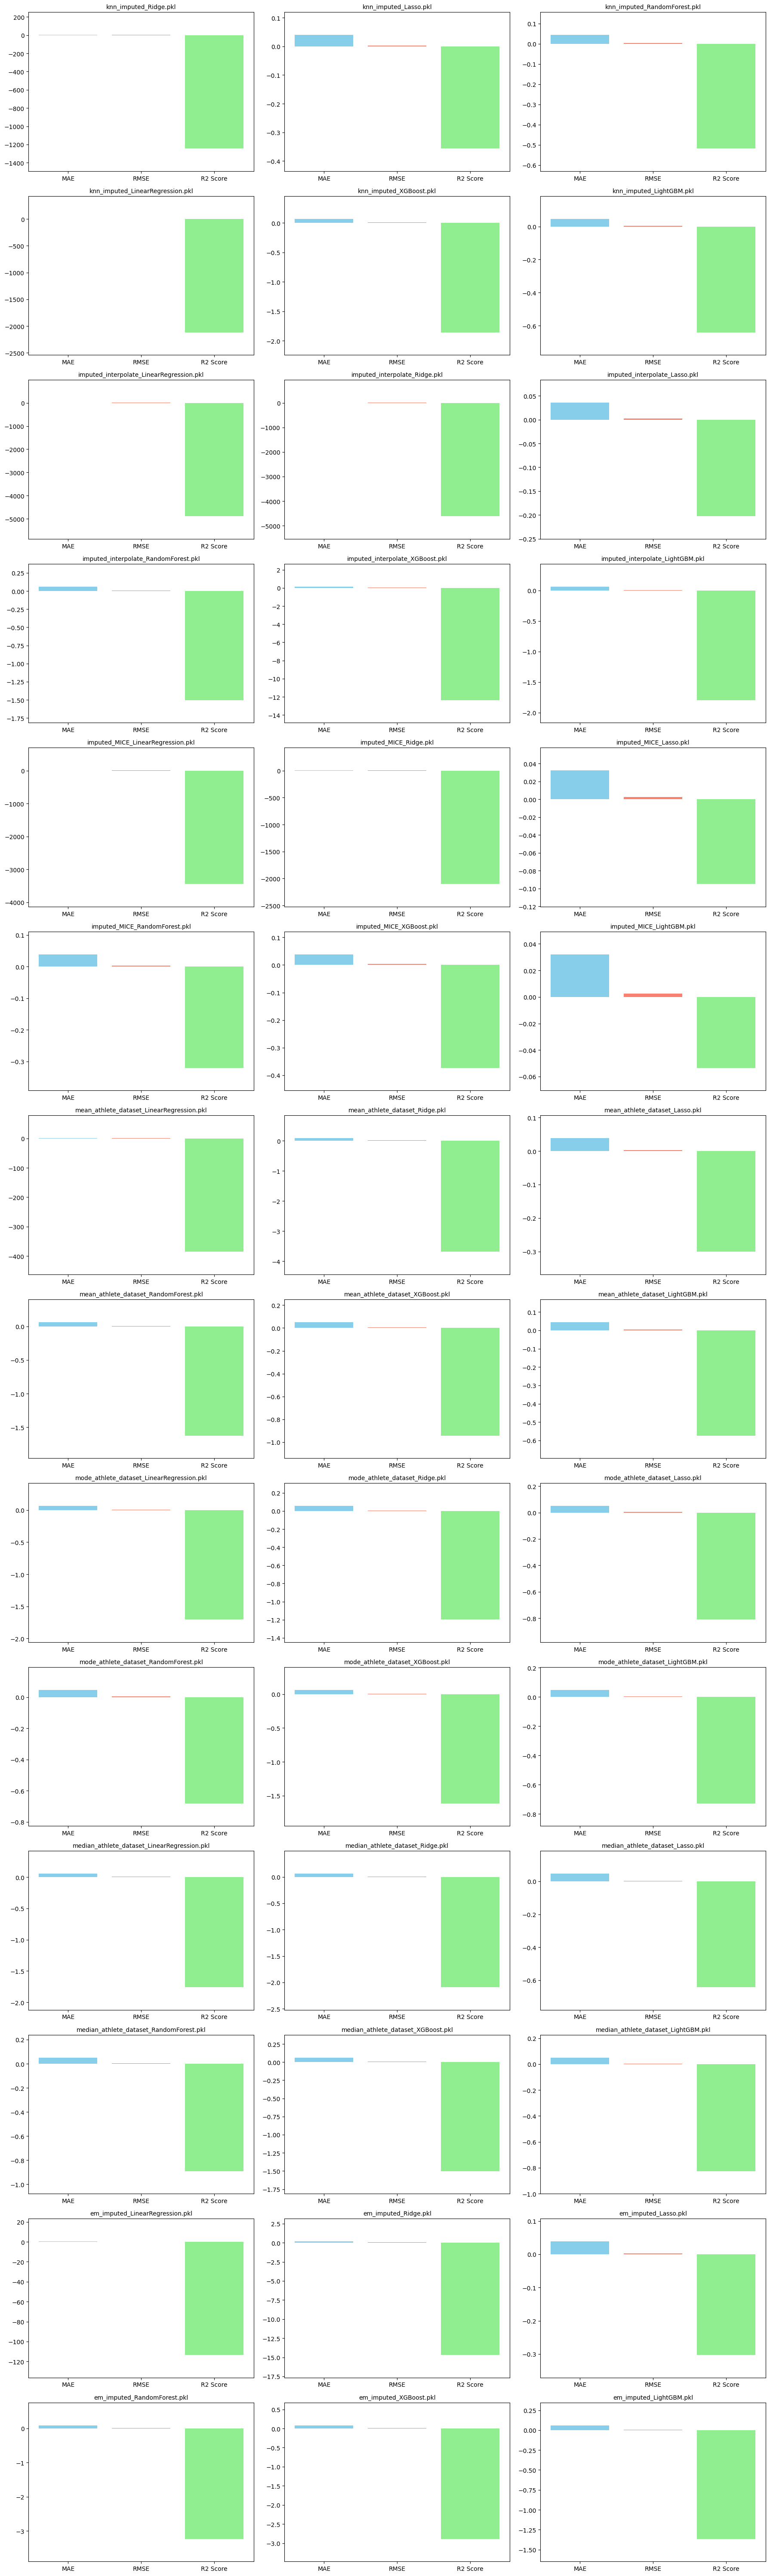

In [30]:
import matplotlib.pyplot as plt

# Set figure size
fig, axes = plt.subplots(14, 3, figsize=(18, 60))  # 14 rows, 3 columns
axes = axes.flatten()  # Flatten to easily loop over

# Plot each model's results
for idx, row in results_df.iterrows():
    ax = axes[idx]
    metrics = ['MAE', 'RMSE', 'R2 Score']
    values = [row['MAE'], row['RMSE'], row['R2 Score']]

    ax.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen'])
    ax.set_title(row['index'], fontsize=10)

    # Auto-adjust y-limits with some padding
    min_val = min(values)
    max_val = max(values)
    padding = (max_val - min_val) * 0.2  # Add 20% padding for clarity

    ax.set_ylim(min_val - padding, max_val + padding)

# Turn off extra empty subplots
for i in range(len(results_df), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
save_path = '/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/model_evaluation_plots.png'
fig.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


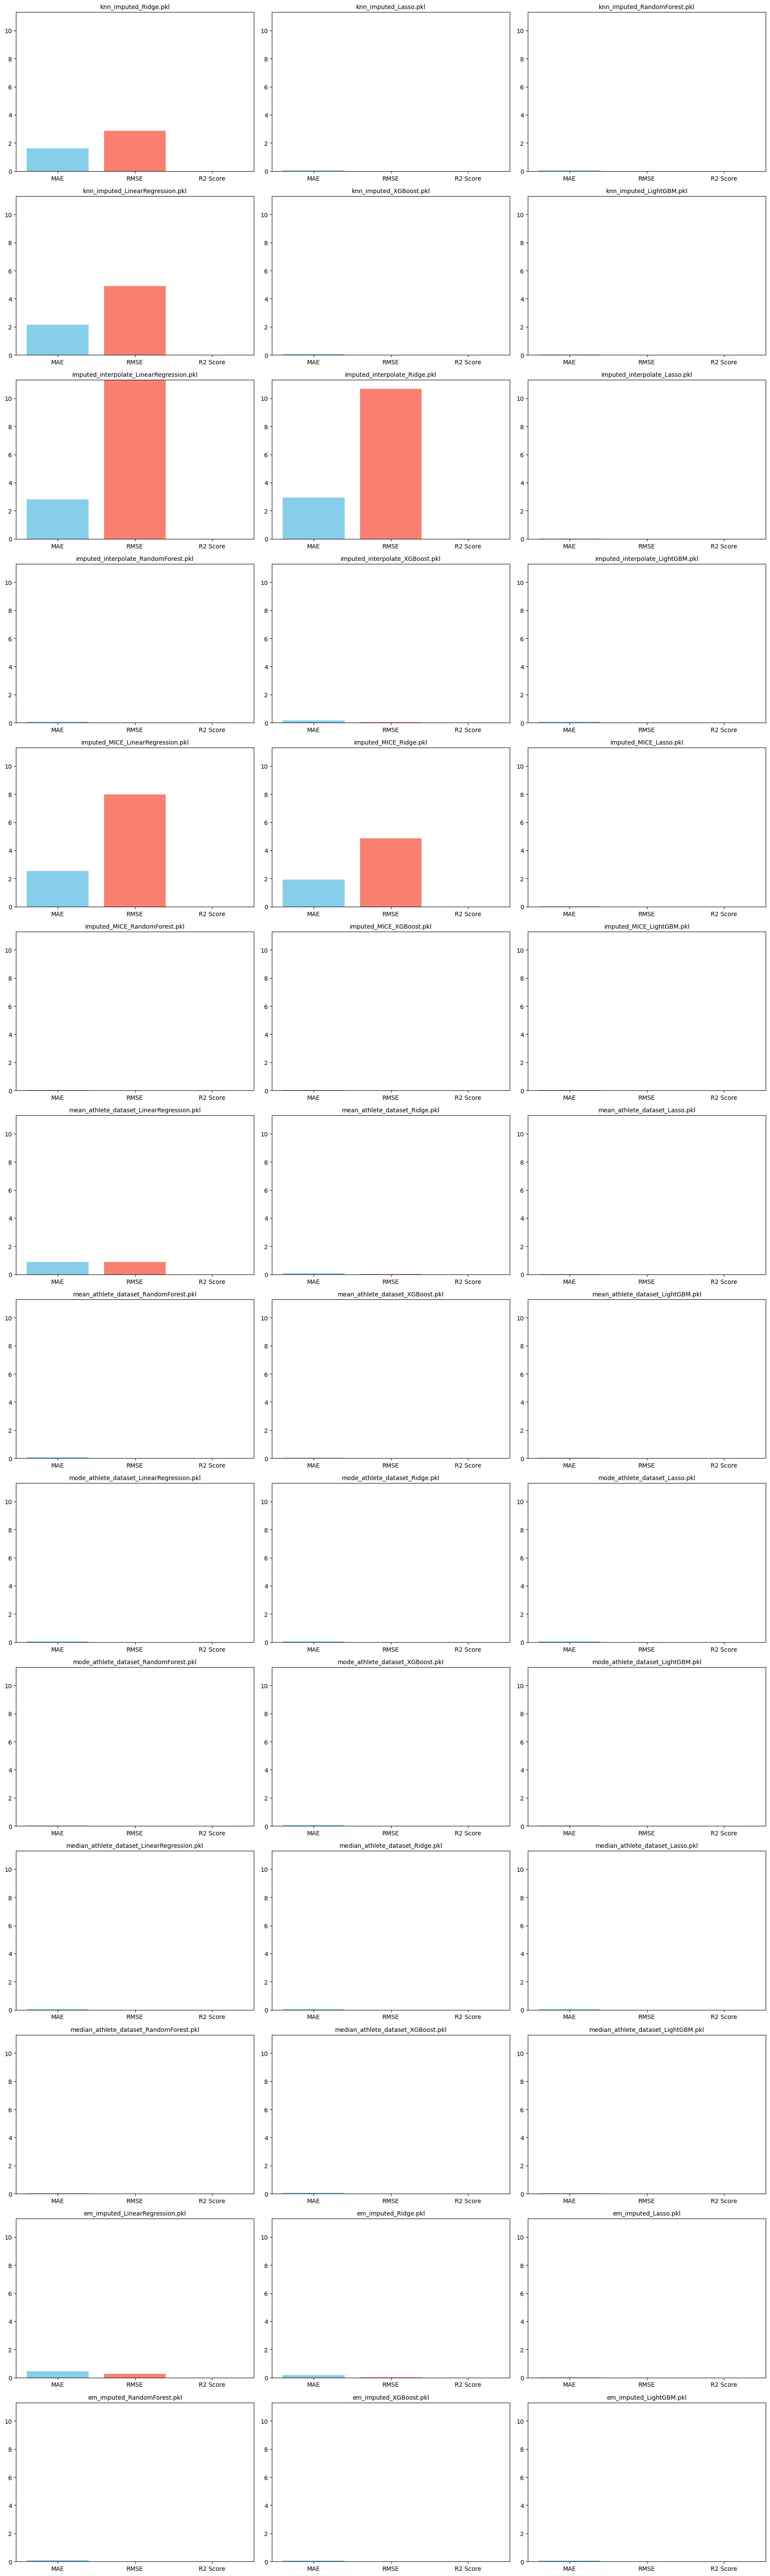

In [28]:
# Set figure size
fig, axes = plt.subplots(14, 3, figsize=(18, 60))  # 14 rows, 3 columns
axes = axes.flatten()  # Flatten it to easily loop over

# Plot each model's results
for idx, row in results_df.iterrows():
    ax = axes[idx]
    metrics = ['MAE', 'RMSE', 'R2 Score']
    values = [row['MAE'], row['RMSE'], row['R2 Score']]

    ax.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen'])
    ax.set_title(row['index'], fontsize=10)
    ax.set_ylim(0, max(results_df[['MAE', 'RMSE']].max().max(), 1))  # set a consistent y limit

# Turn off extra empty subplots
for i in range(len(results_df), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Same above implementation as above but for Sort_Synthetic_Dataset

In [7]:
sorted_synthetic_dataset = sorted_synthetic_dataset.drop(columns=["Athlete", "Date", "Day.of.Week"])
sorted_synthetic_dataset.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Sleep.Disturbances,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,58.681615,162.516356,1.000000,62.234846,7.323889,10.262617,9.122431,91.301426,13.506217,0.000000,...,0.589367,0.670263,76.062156,17.417197,6.913184,29.709915,15.991944,3.667167,31.011345,0.435290
1,55.119153,58.078507,22.011092,100.000000,10.702070,7.797921,9.597218,98.438912,3.000402,0.463936,...,0.187028,0.889960,47.273548,15.596304,1.046646,31.963415,13.869150,2.409684,34.321055,0.420109
2,59.369350,84.965724,58.338076,77.012303,7.885798,6.970669,8.910126,89.027799,14.349772,0.000000,...,0.906220,1.086922,77.645358,16.392271,7.084130,26.345516,17.657529,3.468589,44.631238,0.390046
3,59.390466,84.544114,57.788845,76.096144,7.724825,7.001014,8.916533,88.660104,14.471640,11.438663,...,0.874208,0.957935,69.087936,16.545399,7.201905,25.978174,17.674290,3.512028,44.440170,0.392915
4,48.998093,187.276423,30.655540,49.965238,7.221317,5.595558,9.034040,95.107396,18.157659,7.413986,...,0.450568,0.000000,74.173324,11.880511,7.874259,25.837469,16.449736,3.742130,48.358088,0.419118


In [8]:
sorted_synthetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RHR                             10000 non-null  float64
 1   HRV                             10000 non-null  float64
 2   Recovery                        10000 non-null  float64
 3   Sleep.Score                     10000 non-null  float64
 4   Hours.in.Bed                    10000 non-null  float64
 5   Hours.of.Sleep                  10000 non-null  float64
 6   Sleep.Need                      10000 non-null  float64
 7   Sleep.Efficiency....            10000 non-null  float64
 8   Wake.Periods                    10000 non-null  float64
 9   Sleep.Disturbances              10000 non-null  float64
 10  Latency..min.                   10000 non-null  float64
 11  Cycles                          10000 non-null  float64
 12  REM.Sleep..hours.               1

In [10]:
import os
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Step 1: Setup ===
saved_model_dir = "/content/drive/MyDrive/ML_Project_Dataset/Saved_Models/"  # Folder where your models are saved
model_files = [f for f in os.listdir(saved_model_dir) if f.endswith(".pkl")]
print(model_files)

# === Step 2: Prepare your test dataset ===
# Example: Load dataset
test_data = pd.read_csv("/content/drive/MyDrive/ML_Project_Dataset/Synthetic_Dataset/Sort_Synthetic_Dataset.csv")

# Define the features used during training (replace with actual features)
sleep_recovery_features = [
    "RHR", "HRV", "Recovery", "Sleep.Score", "Hours.in.Bed", "Hours.of.Sleep",
    "Sleep.Efficiency....", "Wake.Periods", "Sleep.Disturbances", "Latency..min.",
    "Cycles", "REM.Sleep..hours.", "Deep.Sleep..hours.", "Light.Sleep..hours.",
    "Awake..hours.", "Sleep.Debt..hours.", "Sleep.Consistency", "Respiratory.Rate",
    "Total.Cycle.Sleep.Time..hours.", "REM.Percentage", "Deep.Sleep.Percentage",
    "Restorative.Sleep..hours.", "Restorative.Sleep...."
]
X_test = sorted_synthetic_dataset[sleep_recovery_features]
y_test = sorted_synthetic_dataset["RSI"]

# For now assuming X_test and y_test are already available in your environment
# If not, uncomment and load your data properly

# === Step 3: Evaluate each model ===
evaluation_results = {}

for model_file in model_files:
    model_path = os.path.join(saved_model_dir, model_file)

    # Load the model
    model = joblib.load(model_path)
    print(f"Testing Model: {model_file}")

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    evaluation_results[model_file] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    }

    # Print metrics
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 40)

# # === Step 4: (Optional) Display all results nicely ===
# results_df = pd.DataFrame.from_dict(evaluation_results, orient="index")
# print("\nSummary of All Model Performances:")
# print(results_df)


['knn_imputed_Ridge.pkl', 'knn_imputed_Lasso.pkl', 'knn_imputed_RandomForest.pkl', 'knn_imputed_LinearRegression.pkl', 'knn_imputed_XGBoost.pkl', 'knn_imputed_LightGBM.pkl', 'imputed_interpolate_LinearRegression.pkl', 'imputed_interpolate_Ridge.pkl', 'imputed_interpolate_Lasso.pkl', 'imputed_interpolate_RandomForest.pkl', 'imputed_interpolate_XGBoost.pkl', 'imputed_interpolate_LightGBM.pkl', 'imputed_MICE_LinearRegression.pkl', 'imputed_MICE_Ridge.pkl', 'imputed_MICE_Lasso.pkl', 'imputed_MICE_RandomForest.pkl', 'imputed_MICE_XGBoost.pkl', 'imputed_MICE_LightGBM.pkl', 'mean_athlete_dataset_LinearRegression.pkl', 'mean_athlete_dataset_Ridge.pkl', 'mean_athlete_dataset_Lasso.pkl', 'mean_athlete_dataset_RandomForest.pkl', 'mean_athlete_dataset_XGBoost.pkl', 'mean_athlete_dataset_LightGBM.pkl', 'mode_athlete_dataset_LinearRegression.pkl', 'mode_athlete_dataset_Ridge.pkl', 'mode_athlete_dataset_Lasso.pkl', 'mode_athlete_dataset_RandomForest.pkl', 'mode_athlete_dataset_XGBoost.pkl', 'mode_ath

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_Lasso.pkl
MAE: 0.0399
RMSE: 0.0031
R2 Score: -0.3558
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_RandomForest.pkl
MAE: 0.0440
RMSE: 0.0035
R2 Score: -0.5176
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_LinearRegression.pkl
MAE: 2.1452
RMSE: 4.8926
R2 Score: -2115.6786
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: knn_imputed_XGBoost.pkl
MAE: 0.0690
RMSE: 0.0066
R2 Score: -1.8564
----------------------------------------
Testing Model: knn_imputed_LightGBM.pkl
MAE: 0.0466
RMSE: 0.0038
R2 Score: -0.6403
----------------------------------------
Testing Model: imputed_interpolate_LinearRegression.pkl
MAE: 2.8216
RMSE: 11.2986
R2 Score: -4887.1199
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_Ridge.pkl
MAE: 2.9410
RMSE: 10.6616
R2 Score: -4611.5215
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_Lasso.pkl
MAE: 0.0357
RMSE: 0.0028
R2 Score: -0.2024
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_RandomForest.pkl
MAE: 0.0618
RMSE: 0.0058
R2 Score: -1.5023
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: imputed_interpolate_XGBoost.pkl
MAE: 0.1588
RMSE: 0.0309
R2 Score: -12.3551
----------------------------------------
Testing Model: imputed_interpolate_LightGBM.pkl
MAE: 0.0660
RMSE: 0.0065
R2 Score: -1.7934
----------------------------------------
Testing Model: imputed_MICE_LinearRegression.pkl
MAE: 2.5441
RMSE: 7.9610
R2 Score: -3443.1593
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_Ridge.pkl
MAE: 1.9126
RMSE: 4.8586
R2 Score: -2100.9822
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_Lasso.pkl
MAE: 0.0323
RMSE: 0.0025
R2 Score: -0.0948
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_RandomForest.pkl
MAE: 0.0391
RMSE: 0.0031
R2 Score: -0.3198
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: imputed_MICE_XGBoost.pkl
MAE: 0.0388
RMSE: 0.0032
R2 Score: -0.3732
----------------------------------------
Testing Model: imputed_MICE_LightGBM.pkl
MAE: 0.0322
RMSE: 0.0024
R2 Score: -0.0534
----------------------------------------
Testing Model: mean_athlete_dataset_LinearRegression.pkl
MAE: 0.8660
RMSE: 0.8925
R2 Score: -385.1412
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_Ridge.pkl
MAE: 0.0863
RMSE: 0.0108
R2 Score: -3.6840
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_Lasso.pkl
MAE: 0.0385
RMSE: 0.0030
R2 Score: -0.3004
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_RandomForest.pkl
MAE: 0.0650
RMSE: 0.0061
R2 Score: -1.6239
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: mean_athlete_dataset_XGBoost.pkl
MAE: 0.0521
RMSE: 0.0045
R2 Score: -0.9418
----------------------------------------
Testing Model: mean_athlete_dataset_LightGBM.pkl
MAE: 0.0453
RMSE: 0.0036
R2 Score: -0.5734
----------------------------------------
Testing Model: mode_athlete_dataset_LinearRegression.pkl
MAE: 0.0658
RMSE: 0.0062
R2 Score: -1.7036
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_Ridge.pkl
MAE: 0.0558
RMSE: 0.0051
R2 Score: -1.1968
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_Lasso.pkl
MAE: 0.0502
RMSE: 0.0042
R2 Score: -0.8091
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_RandomForest.pkl
MAE: 0.0472
RMSE: 0.0039
R2 Score: -0.6812
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: mode_athlete_dataset_XGBoost.pkl
MAE: 0.0641
RMSE: 0.0060
R2 Score: -1.6121
----------------------------------------
Testing Model: mode_athlete_dataset_LightGBM.pkl
MAE: 0.0484
RMSE: 0.0040
R2 Score: -0.7273
----------------------------------------
Testing Model: median_athlete_dataset_LinearRegression.pkl
MAE: 0.0546
RMSE: 0.0064
R2 Score: -1.7575
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_Ridge.pkl
MAE: 0.0611
RMSE: 0.0071
R2 Score: -2.0910
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_Lasso.pkl
MAE: 0.0467
RMSE: 0.0038
R2 Score: -0.6430
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_RandomForest.pkl
MAE: 0.0516
RMSE: 0.0044
R2 Score: -0.8895
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: median_athlete_dataset_XGBoost.pkl
MAE: 0.0629
RMSE: 0.0058
R2 Score: -1.5008
----------------------------------------
Testing Model: median_athlete_dataset_LightGBM.pkl
MAE: 0.0505
RMSE: 0.0042
R2 Score: -0.8253
----------------------------------------
Testing Model: em_imputed_LinearRegression.pkl
MAE: 0.4404
RMSE: 0.2644
R2 Score: -113.3885
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_Ridge.pkl
MAE: 0.1698
RMSE: 0.0363
R2 Score: -14.6892
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_Lasso.pkl
MAE: 0.0385
RMSE: 0.0030
R2 Score: -0.3027
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_RandomForest.pkl
MAE: 0.0880
RMSE: 0.0098
R2 Score: -3.2270
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Testing Model: em_imputed_XGBoost.pkl
MAE: 0.0835
RMSE: 0.0090
R2 Score: -2.8871
----------------------------------------
Testing Model: em_imputed_LightGBM.pkl
MAE: 0.0610
RMSE: 0.0055
R2 Score: -1.3643
----------------------------------------


In [11]:
# === Step 4: (Optional) Display all results nicely ===
results_df = pd.DataFrame.from_dict(evaluation_results, orient="index")
print("\nSummary of All Model Performances:")
print(results_df)


Summary of All Model Performances:
                                                  MAE       RMSE     R2 Score
knn_imputed_Ridge.pkl                        1.624828   2.875831 -1243.168749
knn_imputed_Lasso.pkl                        0.039917   0.003134    -0.355784
knn_imputed_RandomForest.pkl                 0.043981   0.003508    -0.517557
knn_imputed_LinearRegression.pkl             2.145186   4.892593 -2115.678601
knn_imputed_XGBoost.pkl                      0.069027   0.006602    -1.856384
knn_imputed_LightGBM.pkl                     0.046626   0.003792    -0.640339
imputed_interpolate_LinearRegression.pkl     2.821580  11.298635 -4887.119875
imputed_interpolate_Ridge.pkl                2.940983  10.661604 -4611.521533
imputed_interpolate_Lasso.pkl                0.035683   0.002779    -0.202432
imputed_interpolate_RandomForest.pkl         0.061831   0.005784    -1.502314
imputed_interpolate_XGBoost.pkl              0.158806   0.030870   -12.355092
imputed_interpolate_LightGBM

In [12]:
results_df.to_csv("/content/drive/MyDrive/ML_Project_Dataset/another_results_of_models.csv", index=False)